Minería de Datos

Trabajo Práctico n°3

Integrantes: Lucía Masciangelo, Julieta Texier

Entrega: 17/06/2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

Importamos el dataset

In [ ]:
df = pd.read_csv("CoffeeRatings.csv", sep =';')

In [ ]:
df.head(10)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
5,80,80,775,80,75,775,100,100,12,8492,Green
6,80,80,775,775,758,775,100,100,12,8458,Green
7,85,80,75,775,75,783,100,100,11,8458,Blue-Green
8,775,75,758,75,775,75,100,100,12,8317,Blue-Green
9,767,767,758,75,767,742,100,100,12,830,Bluish-Green


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


tenemos 11 variables de las cuales 10 son numéricas y una sola categórica que es nuestra variable respuesta. Ninguna de las variables presenta nulos

In [ ]:
df.duplicated().sum()

0

no encontramos duplicados

In [ ]:
#miramos las categorías de color
df['Color'].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

ahora vamos a ver si los datos están o no balanceados

In [ ]:
df['Color'].value_counts()

Color
Green           681
Bluish-Green     96
Blue-Green       58
Name: count, dtype: int64

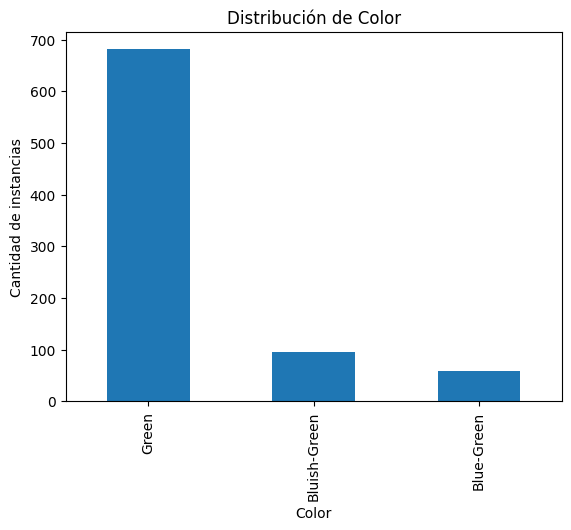

In [ ]:
df['Color'].value_counts().plot(kind = 'bar')
plt.xlabel('Color')
plt.ylabel('Cantidad de instancias')
plt.title('Distribución de Color')
plt.show()

está muy desbalanceado ya que el color Green tiene mucho mas registros que los otros 2.

Hacemos un histograma por cada variable para ver sus distribuciones

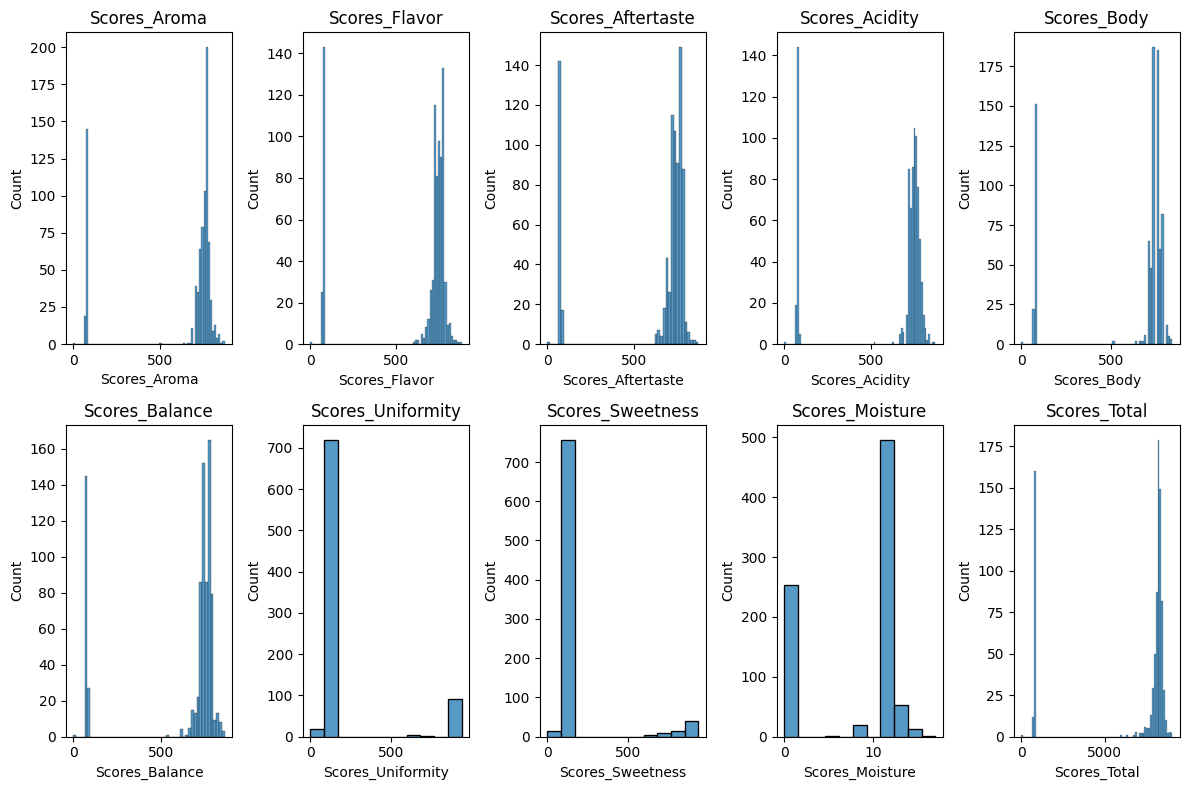

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

# Dibujar los histogramas en cada eje
sns.histplot(data=df['Scores_Aroma'], ax=axes[0, 0])
axes[0, 0].set_title('Scores_Aroma')

sns.histplot(data=df['Scores_Flavor'], ax=axes[0, 1])
axes[0, 1].set_title('Scores_Flavor')

sns.histplot(data=df['Scores_Aftertaste'], ax=axes[0, 2])
axes[0, 2].set_title('Scores_Aftertaste')

sns.histplot(data=df['Scores_Acidity'], ax=axes[0, 3])
axes[0, 3].set_title('Scores_Acidity')

sns.histplot(data=df['Scores_Body'], ax=axes[0, 4])
axes[0, 4].set_title('Scores_Body')

sns.histplot(data=df['Scores_Balance'], ax=axes[1, 0])
axes[1, 0].set_title('Scores_Balance')

sns.histplot(data=df['Scores_Uniformity'], ax=axes[1, 1])
axes[1, 1].set_title('Scores_Uniformity')

sns.histplot(data=df['Scores_Sweetness'], ax=axes[1, 2])
axes[1, 2].set_title('Scores_Sweetness')

sns.histplot(data=df['Scores_Moisture'], ax=axes[1, 3])
axes[1, 3].set_title('Scores_Moisture')

sns.histplot(data=df['Scores_Total'], ax=axes[1, 4])
axes[1, 4].set_title('Scores_Total')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

como podemos ver algo pasó con los datos que tienen dos picos en todas las variables,fuimos a la pagina oficial de donde se extrageron los datos y vimos que todas las variables van de 0 a 10, por lo tanto vamos a agregarle una coma después del primer dígito para poder continuar con el análisis


In [ ]:
# Función para agregar una coma después del primer dígito
def add_comma(value):
    value_str = str(value)
    # Verificar si es un número (incluyendo decimales)
    if value_str.replace('.', '', 1).isdigit() or (value_str.startswith('-') and value_str[1:].replace('.', '', 1).isdigit()):
        if len(value_str) > 1:
            parts = value_str.split('.')
            parts[0] = parts[0][0] + '.' + parts[0][1:]
            return '.'.join(parts)
    return value_str

# Aplicar la función a todas las columnas del DataFrame
df = df.applymap(add_comma)

In [ ]:
df.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,8.5,8.5,8.0,8.0,8.0,8.0,1.00,1.00,1.2,8.692,Green
1,8.5,8.17,8.0,7.75,8.0,8.0,1.00,1.00,1.2,8.642,Green
2,8.33,8.0,8.0,8.0,7.75,8.0,1.00,1.00,1.1,8.608,Blue-Green
3,8.0,8.0,8.0,7.67,7.75,8.0,1.00,1.00,1.1,8.542,Blue-Green
4,8.0,7.92,7.75,7.75,8.0,7.75,1.00,1.00,1.1,8.492,Green


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    object
 1   Scores_Flavor      835 non-null    object
 2   Scores_Aftertaste  835 non-null    object
 3   Scores_Acidity     835 non-null    object
 4   Scores_Body        835 non-null    object
 5   Scores_Balance     835 non-null    object
 6   Scores_Uniformity  835 non-null    object
 7   Scores_Sweetness   835 non-null    object
 8   Scores_Moisture    835 non-null    object
 9   Scores_Total       835 non-null    object
 10  Color              835 non-null    object
dtypes: object(11)
memory usage: 71.9+ KB


Vemos que todos los datos quedaron como object asi que los pasamos a float

In [ ]:
df['Scores_Aroma'] = df['Scores_Aroma'].astype(float)
df['Scores_Flavor'] = df['Scores_Flavor'].astype(float)
df['Scores_Aftertaste'] = df['Scores_Aftertaste'].astype(float)
df['Scores_Acidity'] = df['Scores_Acidity'].astype(float)
df['Scores_Body'] = df['Scores_Body'].astype(float)
df['Scores_Balance'] = df['Scores_Balance'].astype(float)
df['Scores_Uniformity'] = df['Scores_Uniformity'].astype(float)
df['Scores_Sweetness'] = df['Scores_Sweetness'].astype(float)
df['Scores_Moisture'] = df['Scores_Moisture'].astype(float)

Scores_Total la vamos a eliminar pq no aporta en nada la suma de todos los otros scores

In [ ]:
df = df.drop(columns=['Scores_Total'])

volvemos a correr los histogramas para ver como quedaron las variables

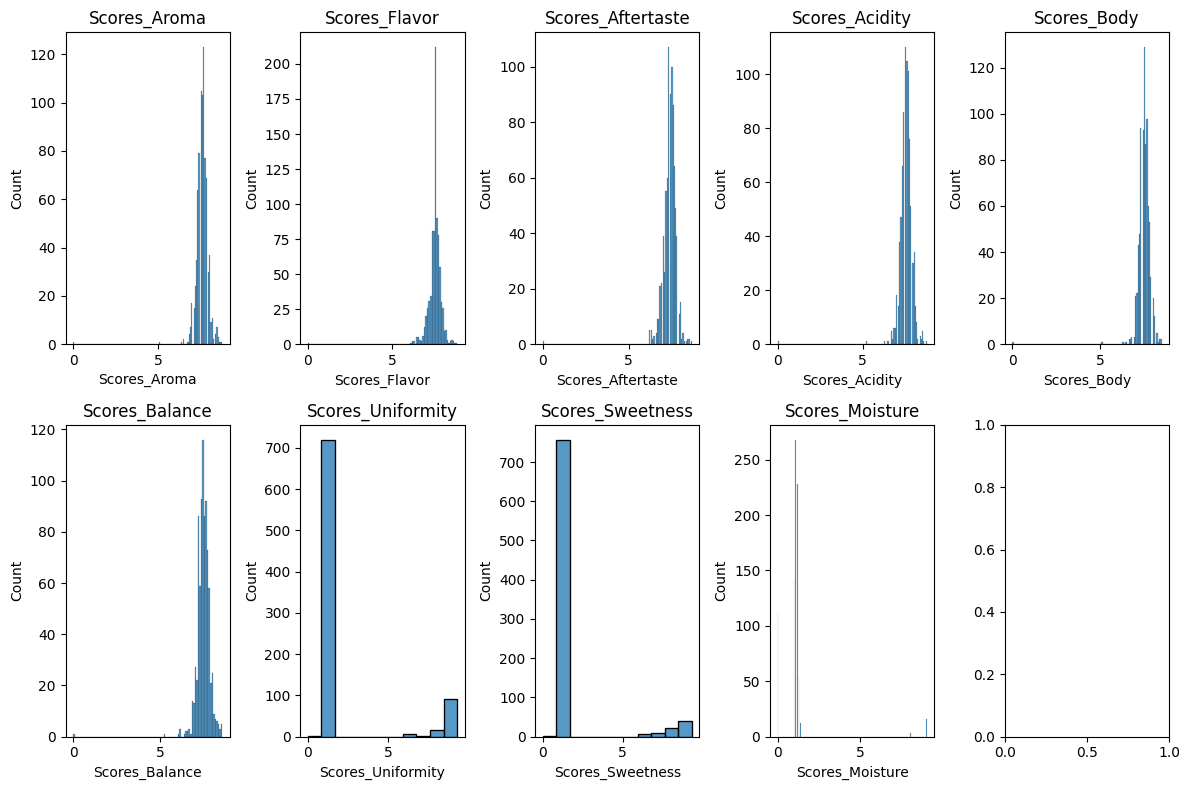

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

# Dibujar los histogramas en cada eje
sns.histplot(data=df['Scores_Aroma'], ax=axes[0, 0])
axes[0, 0].set_title('Scores_Aroma')

sns.histplot(data=df['Scores_Flavor'], ax=axes[0, 1])
axes[0, 1].set_title('Scores_Flavor')

sns.histplot(data=df['Scores_Aftertaste'], ax=axes[0, 2])
axes[0, 2].set_title('Scores_Aftertaste')

sns.histplot(data=df['Scores_Acidity'], ax=axes[0, 3])
axes[0, 3].set_title('Scores_Acidity')

sns.histplot(data=df['Scores_Body'], ax=axes[0, 4])
axes[0, 4].set_title('Scores_Body')

sns.histplot(data=df['Scores_Balance'], ax=axes[1, 0])
axes[1, 0].set_title('Scores_Balance')

sns.histplot(data=df['Scores_Uniformity'], ax=axes[1, 1])
axes[1, 1].set_title('Scores_Uniformity')

sns.histplot(data=df['Scores_Sweetness'], ax=axes[1, 2])
axes[1, 2].set_title('Scores_Sweetness')

sns.histplot(data=df['Scores_Moisture'], ax=axes[1, 3])
axes[1, 3].set_title('Scores_Moisture')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

las variables Scores_Aroma, Scores_Flavor, Scores_Aftertaste, Score_Acidity, Scores_Body y Scores_Balance tienen algunos valores en 0 que los vamos a cambiar por la media, ya que los consideramos nulos.

In [ ]:
media_scores_aroma = np.nanmean(df['Scores_Aroma'])
df['Scores_Aroma'] = df['Scores_Aroma'].replace(0, media_scores_aroma)
media_scores_flavor = np.nanmean(df['Scores_Flavor'])
df['Scores_Flavor'] = df['Scores_Flavor'].replace(0, media_scores_flavor)
media_scores_aftertaste = np.nanmean(df['Scores_Aftertaste'])
df['Scores_Aftertaste'] = df['Scores_Aftertaste'].replace(0, media_scores_aftertaste)
media_scores_acidity = np.nanmean(df['Scores_Acidity'])
df['Scores_Acidity'] = df['Scores_Acidity'].replace(0, media_scores_acidity)
media_scores_body = np.nanmean(df['Scores_Body'])
df['Scores_Body'] = df['Scores_Body'].replace(0, media_scores_body)
media_scores_balance = np.nanmean(df['Scores_Balance'])
df['Scores_Balance'] = df['Scores_Balance'].replace(0, media_scores_balance)

y vemos que pasa con las otras 3 variables restantes (Scores_Uniformity, Scores_Sweetness y Scores_Moisture)

In [ ]:
df['Scores_Uniformity'].value_counts()

Scores_Uniformity
1.00    720
9.33     70
8.67     20
8.00     16
6.67      5
6.00      2
7.33      1
0.00      1
Name: count, dtype: int64

In [ ]:
df['Scores_Sweetness'].value_counts()

Scores_Sweetness
1.00    756
9.33     33
8.00      9
7.75      7
8.67      6
7.58      5
6.67      3
6.00      3
7.83      2
7.67      2
7.42      2
7.92      2
1.33      1
7.08      1
7.50      1
8.42      1
0.00      1
Name: count, dtype: int64

siguiendo la lógica de la variable y mirando el link de donde sacamos la base de datos, vamos a cambiar tanto en Scores_Uniformity como en Scores_Sweetness todos los 1 por 10 ya que es el valor correcto y nosotros lo modificamos al agregarle la coma. Además vamos a tomar los ceros como valores nulos y los reemplazamos por la media

In [ ]:
df['Scores_Uniformity'] = df['Scores_Uniformity'].replace(1.00, 10.00)
df['Scores_Sweetness'] = df['Scores_Sweetness'].replace(1.00, 10.00)
media_scores_uniformity = np.nanmean(df['Scores_Uniformity'])
df['Scores_Uniformity'] = df['Scores_Uniformity'].replace(0, media_scores_uniformity)
media_scores_sweetness = np.nanmean(df['Scores_Sweetness'])
df['Scores_Sweetness'] = df['Scores_Sweetness'].replace(0, media_scores_sweetness)

In [ ]:
df['Scores_Moisture'].value_counts()

Scores_Moisture
1.1    268
1.2    228
1.0    141
0.0    112
1.3     53
9.0     16
1.4     12
8.0      3
6.0      1
1.7      1
Name: count, dtype: int64

Vemos que hay tres valores outliers (9, 8, y 6), y queremos ver cómo se comportan con nuestra variable respuesta.

<Axes: xlabel='Scores_Moisture', ylabel='Count'>

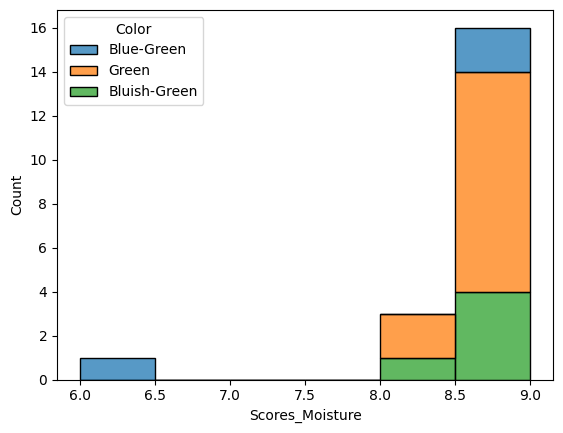

In [ ]:
df_grafico = df[(df['Scores_Moisture'] == 9.0) | (df['Scores_Moisture'] == 8.0) | (df['Scores_Moisture'] == 6.0)]

sns.histplot(data=df_grafico, x='Scores_Moisture', hue='Color', multiple='stack')
plt.xlabel('Scores_Moisture')
plt.ylabel('Cantidad de instancias')
plt.title('Distribución de Scores_Moisture por Color')
plt.show()

Dado que esos valores que son outliers tienen algunos valores de mis categorías minoritarias, los vamos a dejar igual.


ahora si vemos como quedaron nuestros datos

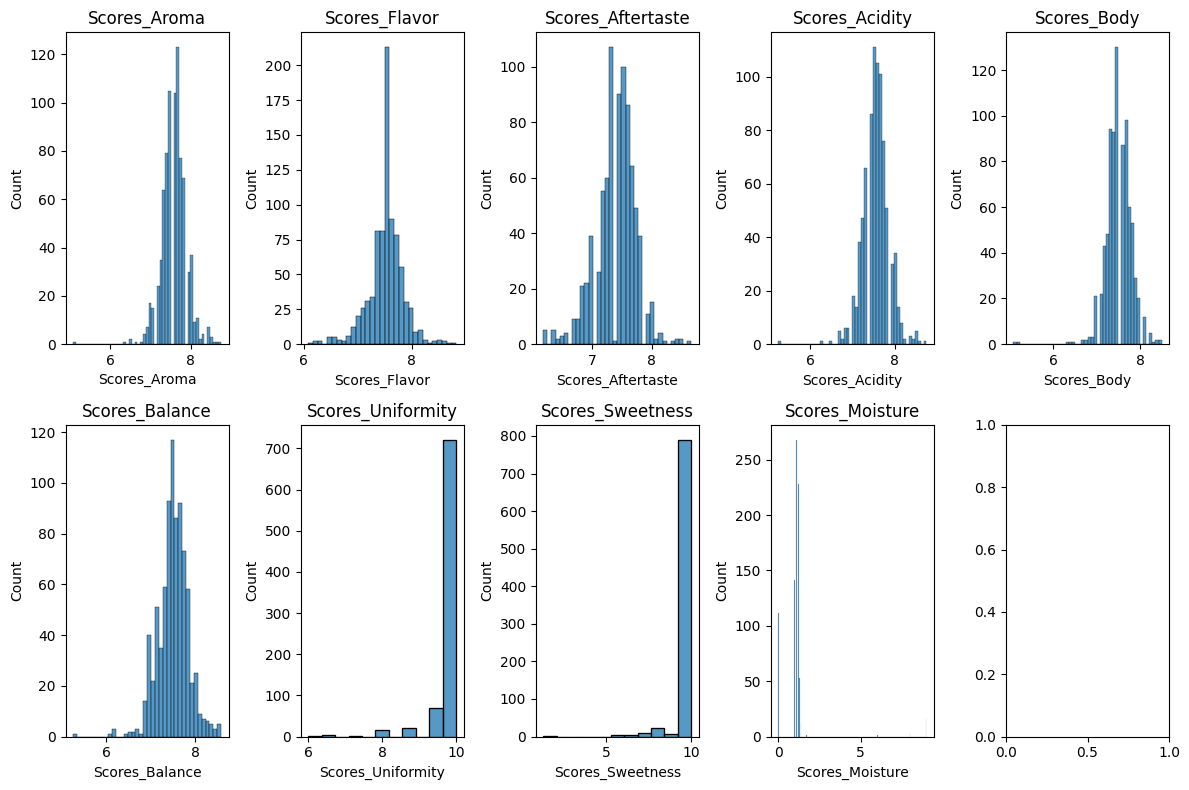

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

# Dibujar los histogramas en cada eje
sns.histplot(data=df['Scores_Aroma'], ax=axes[0, 0])
axes[0, 0].set_title('Scores_Aroma')

sns.histplot(data=df['Scores_Flavor'], ax=axes[0, 1])
axes[0, 1].set_title('Scores_Flavor')

sns.histplot(data=df['Scores_Aftertaste'], ax=axes[0, 2])
axes[0, 2].set_title('Scores_Aftertaste')

sns.histplot(data=df['Scores_Acidity'], ax=axes[0, 3])
axes[0, 3].set_title('Scores_Acidity')

sns.histplot(data=df['Scores_Body'], ax=axes[0, 4])
axes[0, 4].set_title('Scores_Body')

sns.histplot(data=df['Scores_Balance'], ax=axes[1, 0])
axes[1, 0].set_title('Scores_Balance')

sns.histplot(data=df['Scores_Uniformity'], ax=axes[1, 1])
axes[1, 1].set_title('Scores_Uniformity')

sns.histplot(data=df['Scores_Sweetness'], ax=axes[1, 2])
axes[1, 2].set_title('Scores_Sweetness')

sns.histplot(data=df['Scores_Moisture'], ax=axes[1, 3])
axes[1, 3].set_title('Scores_Moisture')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

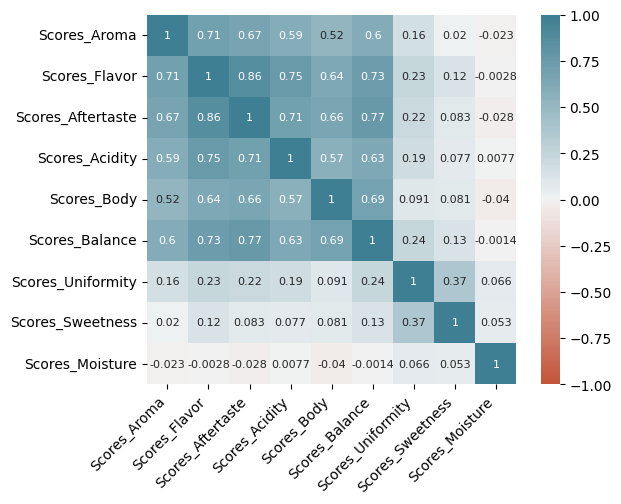

In [ ]:
#Matriz de correlación
corr = df.drop(['Color'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Las variables que mas correlación tiene son:
  

*   Scores_Aftertaste con Scores_Flavor con una correlación positiva de 0.86,
*   Scores_Aftertaste con Scores_Balance con una correlación positiva de 0.77,
*   Scores_Acidity con Scores_Flavor con una correlación positiva de 0.75,
*   Scores_Balance con Scores_Flavor con una correlación positiva de 0.73


Vemos un ejemplo de las dos variables más correlacionadas, con respecto a nuestra variable respuesta.

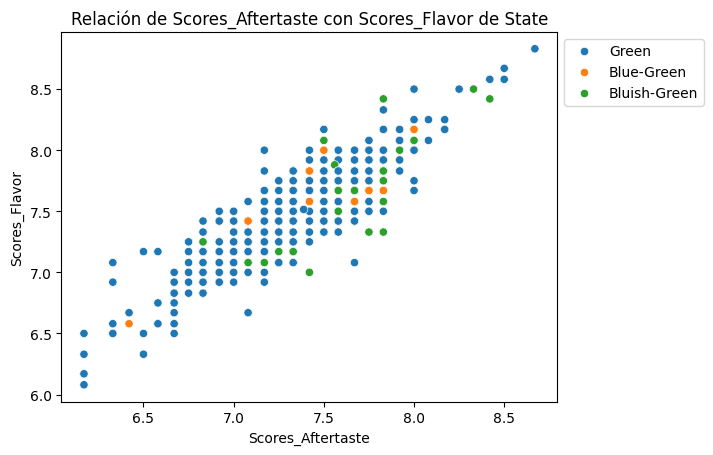

In [ ]:
sns.scatterplot(x='Scores_Aftertaste', y='Scores_Flavor', hue='Color', data=df)
plt.xlabel('Scores_Aftertaste')
plt.ylabel('Scores_Flavor')
plt.title('Relación de Scores_Aftertaste con Scores_Flavor de State')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

No encontramos un patrón definido con respecto a nuestra variable respuesta.

No estandarizamos porque todas las variables están ya entre 0 y 10

Separamos en prueba y entrenamiento

In [ ]:
# Separar X e y
x = df.drop(columns=['Color'])
y = df['Color']
# Dividir el conjunto de datos en entrenamiento y prueba

x_Train, x_Test, y_Train, y_Test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True)

Aplicamos SVM (maquinas de vectores) con kernel lineal

In [ ]:
# Parámetros del Gridsearch
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Aplicar GS para elegir los mejores hiperparámetros
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# Mejor modelo
print('C:',svm_model.best_estimator_.C)

C: 1


In [ ]:
# Predicciones
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_Test)

In [ ]:
# M. Confusión
print(confusion_matrix(y_Test,Y_pred))
print("\n")
print(classification_report(y_Test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(x_Train , y_Train))
print("Testing  set score for SVM: %f" % final_model.score(x_Test  , y_Test ))

[[  0   0  16]
 [  0   0  18]
 [  0   0 133]]


              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        16
Bluish-Green       0.00      0.00      0.00        18
       Green       0.80      1.00      0.89       133

    accuracy                           0.80       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.63      0.80      0.71       167

Training set score for SVM: 0.835329
Testing  set score for SVM: 0.796407


Al estar tan desbalanceados los datos solo pudo clasificar bien a los que son color Green, de hecho a todos los clasificó como Green.
Por eso, todas las métricas de Blue-Green y Bluish-Green dan 0, porque no clasificó ni a un valor con esas categorías.

También notamos que la diferencia entre el train y el test, está indicando que hay un poco de overfitting.

Aplicamos SVM (maquinas de vectores) con kernel gaussiano

In [ ]:
# Parámetros del Gridsearch
params_grid = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}]

In [ ]:
# Aplicar GS para elegir los mejores hiperparámetros
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
# Mejor modelo
print('C:',svm_model.best_estimator_.C,"\n")
print('Gamma:',svm_model.best_estimator_.gamma)

C: 1 

Gamma: 1


In [ ]:
# Predicciones
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_Test)

In [ ]:
# M. Confusión
print(confusion_matrix(y_Test,Y_pred))
print("\n")
print(classification_report(y_Test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(x_Train , y_Train))
print("Testing  set score for SVM: %f" % final_model.score(x_Test  , y_Test ))

[[  0   0  16]
 [  0   0  18]
 [  0   0 133]]


              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        16
Bluish-Green       0.00      0.00      0.00        18
       Green       0.80      1.00      0.89       133

    accuracy                           0.80       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.63      0.80      0.71       167

Training set score for SVM: 0.835329
Testing  set score for SVM: 0.796407


Nos dio exactamente igual que con el kernel lineal. Podemos concluir lo mismo que antes


Aplicamos Random Forest

In [ ]:
# Definimos la variable objetivo (y)
train_labels = np.array(y_Train)
test_labels = np.array(y_Test)
# Guardamos las variables que estamos usando
feature_list = list(x_Train.columns)
# Convertimos los df de variables (x) a array
train_features = np.array(x_Train)
test_features = np.array(x_Test)

In [ ]:
# Parámetros del Gridsearch
params_grid = [{'n_estimators': [0,100,150,200], 'max_depth': [1, 3, 5, 7], 'max_features': [2, 3, 5, 6], 'random_state' : [1234]}]

In [ ]:
# Aplicar GS para elegir los mejores hiperparámetros
rf_model = GridSearchCV(RandomForestClassifier(), params_grid, cv=5)
rf_model.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 3, 5, 7],
                          'max_features': [2, 3, 5, 6],
                          'n_estimators': [0, 100, 150, 200],
                          'random_state': [1234]}])

In [ ]:
# Mejor modelo
print('n_estimators:',rf_model.best_estimator_.n_estimators,"\n")
print('max_features:',rf_model.best_estimator_.max_features,"\n")
print('max_depth:',rf_model.best_estimator_.max_depth)

n_estimators: 100 

max_features: 3 

max_depth: 7


In [ ]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=7,
                            max_features=3,
                            random_state=1234
                            )

In [ ]:
random_forest = rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

In [ ]:
print(confusion_matrix(test_labels,predictions))
print("\n")
print(classification_report(test_labels, predictions))

print("Training set score for Random Forest: %f" % rf.score(train_features , train_labels))
print("Testing  set score for Random Forest: %f" % rf.score(test_features  , test_labels))

[[  0   0  16]
 [  0   0  18]
 [  0   0 133]]


              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        16
Bluish-Green       0.00      0.00      0.00        18
       Green       0.80      1.00      0.89       133

    accuracy                           0.80       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.63      0.80      0.71       167

Training set score for Random Forest: 0.847305
Testing  set score for Random Forest: 0.796407


La única diferencia con SVM es en la métrica de train que dio apenas mejor, sin embargo llegamos a la misma conclusión.

**Conclusiones finales:** Al estar tan desbalanceado el data set no logra estimar los colores Blue-Green y Bluish-Green, ya que tiene demasiados valores de Green y muy pocos de los otros.